<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NLP-Week-10:-Distributed-Representations-part-2" data-toc-modified-id="NLP-Week-10:-Distributed-Representations-part-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NLP Week 10: Distributed Representations part 2</a></span><ul class="toc-item"><li><span><a href="#Training-our-own-embeddings" data-toc-modified-id="Training-our-own-embeddings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training our own embeddings</a></span></li><li><span><a href="#Continuous-bag-of-words-(CBOW)" data-toc-modified-id="Continuous-bag-of-words-(CBOW)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Continuous bag of words (CBOW)</a></span></li><li><span><a href="#Important-links" data-toc-modified-id="Important-links-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Important links</a></span></li></ul></li></ul></div>

# NLP Week 10: Distributed Representations part 2

## Training our own embeddings

Now we’ll focus on training our own word embeddings. For this, we’ll look at two
architectural variants that were proposed in the original Word2vec approach. The
two variants are:
- Continuous bag of words (CBOW)
- SkipGram

## Continuous bag of words (CBOW)

In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears.


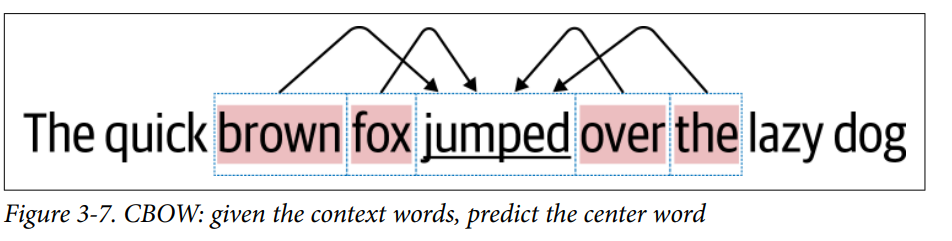

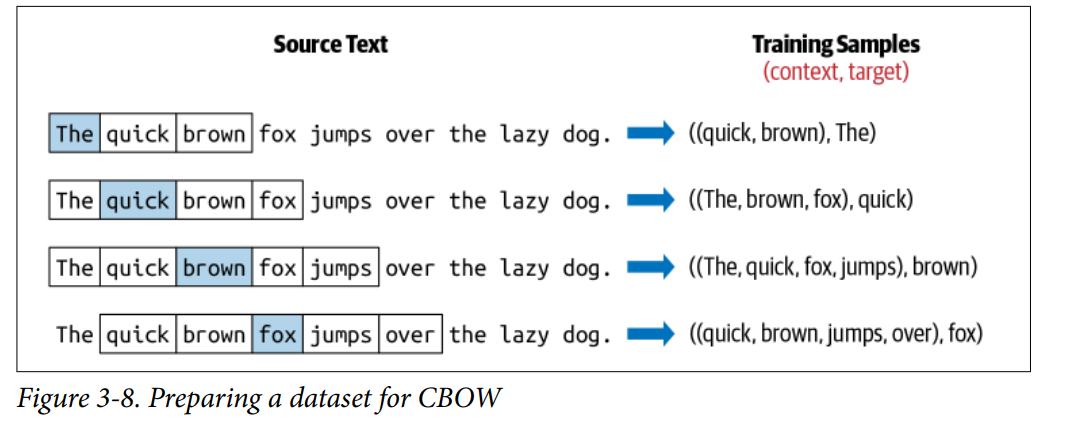

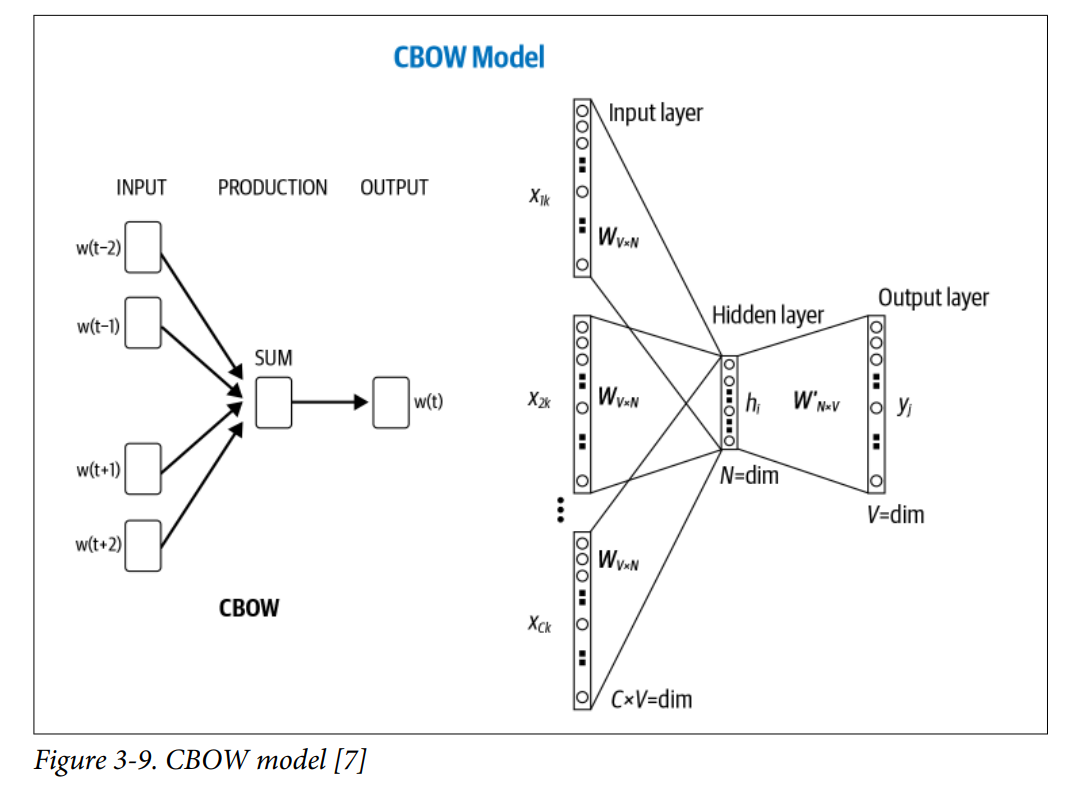

In [2]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown


In [13]:
nltk.download('brown')
data = brown.sents()  # Use the Brown corpus from NLTK as sample data


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\aliae\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
model = Word2Vec(data, min_count=1, size=100, window=5, sg=0, workers=10)

In [ ]:
model.train(data, total_examples=len(data), epochs=200)

In [ ]:
word_vectors = model.wv

In [ ]:
similarity = word_vectors.similarity('woman', 'man')
print(f"Similarity between 'woman' and 'man': {similarity}")

In [ ]:
# Visualize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

fig = plt.figure(figsize=(20,10))

plt.scatter(result[:50, 0], result[:50, 1])
words = list(model.wv.vocab)[:50]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)
plt.show()


In [5]:
#Import a test data set provided in gensim to train a model
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')


#Build the model, by selecting the parameters.
model = Word2Vec(common_texts, size=10, window=5, min_count=1, workers=4, sg=1)

#Save the model
model.save("tempmodel.w2v")

#Inspect the model by looking for the most similar words for a test word.
print(model.wv.most_similar('computer', topn=5))

#Let us see what the 10-dimensional vector for 'computer' looks like.
print(model['computer'])

[('graph', 0.7245731353759766), ('eps', 0.37068459391593933), ('minors', 0.18500211834907532), ('system', 0.08506222069263458), ('time', 0.011266201734542847)]
[-0.04522041 -0.03557378 -0.03946231  0.0006898   0.03707801  0.02014183
  0.03330788  0.01684832 -0.02399287 -0.01015234]


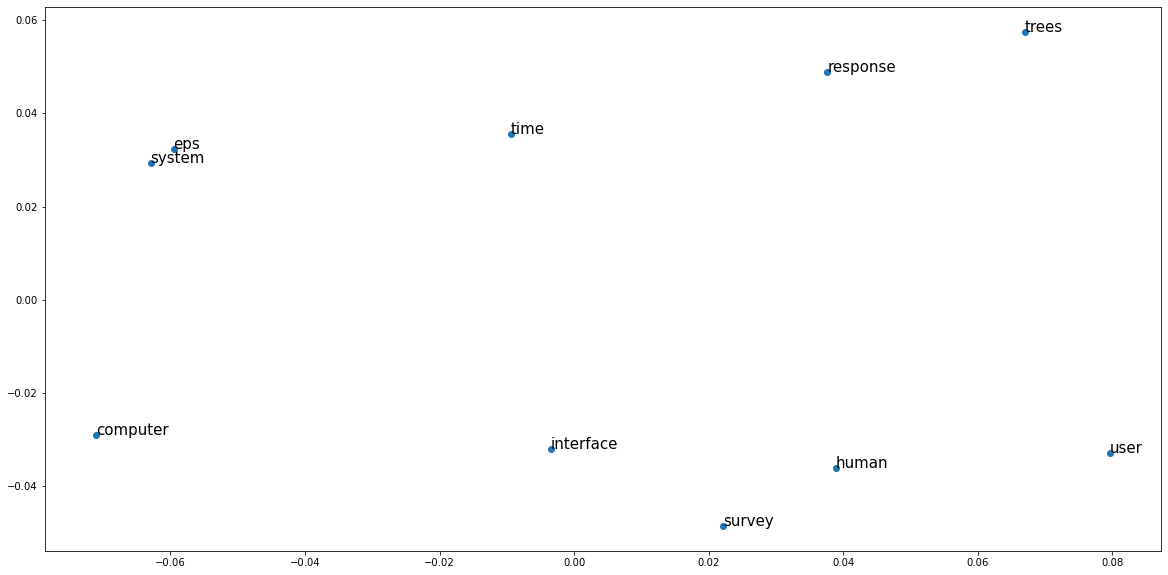

In [6]:
# Visualize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

fig = plt.figure(figsize=(20,10))

plt.scatter(result[:10, 0], result[:10, 1])
words = list(model.wv.vocab)[:10]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)
plt.show()


In [8]:
# Import a test data set provided in gensim to train a model
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Build the Word2Vec model with specified hyperparameters
model = Word2Vec(common_texts, size=10, window=5, min_count=1, workers=4)

# Save the trained model to a file
model.save("tempmodel.w2v")

# Find the top 5 most similar words to 'computer'
print(model.wv.most_similar('user', topn=5))

# Print the 10-dimensional vector for the word 'computer'
print(model['user'])

[('human', 0.45759788155555725), ('minors', 0.44184213876724243), ('eps', 0.3522655963897705), ('trees', 0.32938656210899353), ('interface', 0.18802642822265625)]
[ 0.0437172  -0.02994391  0.04130596  0.04468018 -0.0154093   0.01423024
 -0.03398703 -0.03142796 -0.01999429 -0.01924191]


12


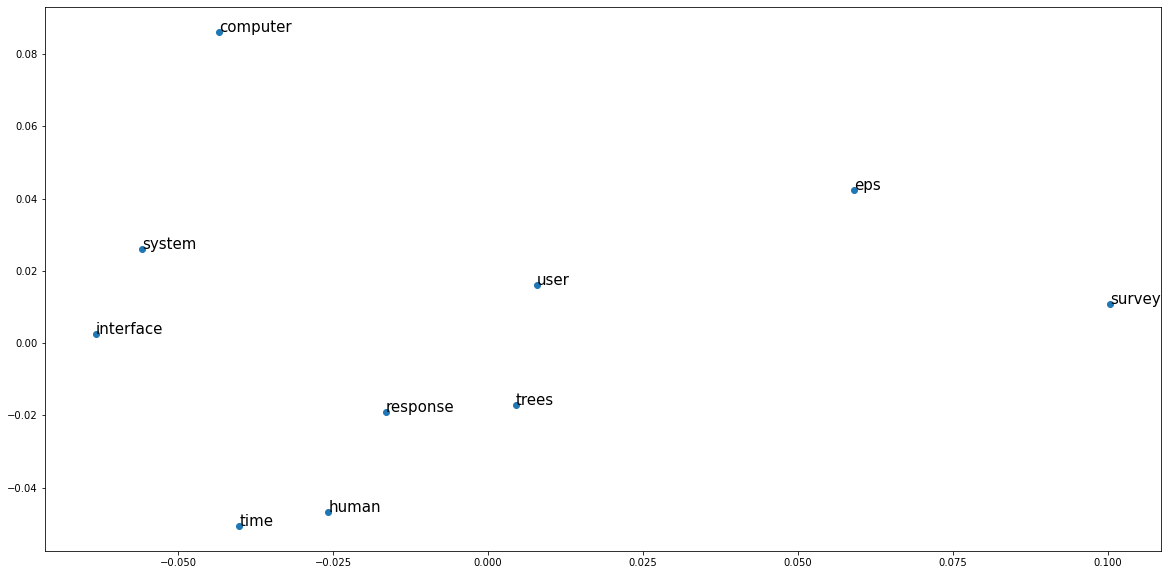

In [11]:
# Visualize the embeddings of the first 50 words using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Get the of the vocabulary
print(len( model[model.wv.vocab]))

# Get the embeddings for all words in the vocabulary
X = model[model.wv.vocab]

# Reduce the dimensionality of the embeddings to 2 using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the embeddings
fig = plt.figure(figsize=(20,10))
plt.scatter(result[:10, 0], result[:10, 1])

# Label each point in the scatter plot with the corresponding word
words = list(model.wv.vocab)[:10]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)
plt.show()

## Important links

https://radimrehurek.com/gensim/models/word2vec.html